<a href="https://colab.research.google.com/github/spacee48/SIT719/blob/main/5_2_dataset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Random Forest(RF) on IoT Combined Dataset**

Importing libraries

In [1]:
import timeit
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
#warnings.filterwarnings('always')

**Upload File**

In [2]:
#uploaded = files.upload()

**Importing the Dataset**

In [3]:
import io
import pandas as pd
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]

dataset = pd.read_csv(io.BytesIO(uploaded[filename]))

Saving Processed_Combined_IoT_dataset.csv to Processed_Combined_IoT_dataset (6).csv


**Exploratory Data Analysis**

In [4]:
dataset.head()

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,current_temperature,door_state,fridge_temperature,humidity,latitude,light_status,longitude,motion_status,pressure,sphone_signal,temp_condition,temperature,thermostat_status,label
0,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.930769,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0
1,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.588462,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0
2,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.076923,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1,0
3,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.292308,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1,0
4,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.746154,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0


In [5]:
print(dataset.shape)

(401119, 18)


In [6]:
print(list(dataset.columns))

['FC1_Read_Input_Register', 'FC2_Read_Discrete_Value', 'FC3_Read_Holding_Register', 'FC4_Read_Coil', 'current_temperature', 'door_state', 'fridge_temperature', 'humidity', 'latitude', 'light_status', 'longitude', 'motion_status', 'pressure', 'sphone_signal', 'temp_condition', 'temperature', 'thermostat_status', 'label']


In [7]:
target_cols = list(dataset.columns[-1:])
target_cols

['label']

In [8]:
feature_cols = list(dataset.columns[:-1])
feature_cols

['FC1_Read_Input_Register',
 'FC2_Read_Discrete_Value',
 'FC3_Read_Holding_Register',
 'FC4_Read_Coil',
 'current_temperature',
 'door_state',
 'fridge_temperature',
 'humidity',
 'latitude',
 'light_status',
 'longitude',
 'motion_status',
 'pressure',
 'sphone_signal',
 'temp_condition',
 'temperature',
 'thermostat_status']

**Split Dataset**

In [9]:
# split dataset in features and target variable
X = dataset.drop('label', axis=1) # features
y = dataset['label'] # target variable

In [10]:
X.head()

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,current_temperature,door_state,fridge_temperature,humidity,latitude,light_status,longitude,motion_status,pressure,sphone_signal,temp_condition,temperature,thermostat_status
0,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.930769,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1
1,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.588462,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1
2,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.076923,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1
3,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.292308,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1
4,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.746154,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1


In [11]:
y.head()

,label
0,0
1,0
2,0
3,0
4,0


**Splitting Data**

In [12]:
# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [13]:
# check the shape of all of these
print("X_train shape is : ", X_train.shape)
print("X_test shape is : ", X_test.shape)
print("y_train shape is : ", y_train.shape)
print("y_test shape is : ", y_test.shape)

X_train shape is :  (280783, 17)
X_test shape is :  (120336, 17)
y_train shape is :  (280783,)
y_test shape is :  (120336,)


**Building Model**

In [14]:
# calculate start time
start = timeit.default_timer()

# create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

# train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

# calculate stop time
stop = timeit.default_timer()
train_time = stop - start

In [15]:
# calculate start time
start = timeit.default_timer()

# predict the model
y_pred = clf.predict(X_test)

# calculate stop time
stop = timeit.default_timer()
test_time = stop - start

**Evaluating Model**

In [16]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[69918  3577]
 [12069 34772]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     73495
           1       0.91      0.74      0.82     46841

    accuracy                           0.87    120336
   macro avg       0.88      0.85      0.86    120336
weighted avg       0.87      0.87      0.87    120336



In [17]:
# model accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# model precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred))

# model recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred))

# calculate F1 Score
print("F1 Score:", metrics.f1_score(y_test, y_pred))

# calculate mean absolute error
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))

# train time
print("Train Time(s):", train_time)

# test time
print("Test Time(s):", test_time)

Accuracy: 0.8699807206488499
Precision: 0.9067250775769903
Recall: 0.7423411114194829
F1 Score: 0.816339946003052
Mean Absolute Error: 0.13001927935115012
Cohens kappa: 0.7172503408145807
ROC AUC: 0.8468355669349948
Train Time(s): 92.09875443400051
Test Time(s): 3.8510263719999784


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score, ConfusionMatrixDisplay
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

results = {}

# Evaluation loop
for name, model in models.items():
    print(f"\n=== Training: {name} ===")

    start = timeit.default_timer()
    model.fit(X_train, y_train)
    train_time = timeit.default_timer() - start

    start = timeit.default_timer()
    y_pred = model.predict(X_test)
    test_time = timeit.default_timer() - start

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"Train Time: {train_time:.2f} sec")
    print(f"Test Time:  {test_time:.2f} sec")
    print("Confusion Matrix:\n", cm)

    results[name] = {
        "model": model,
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "train_time": train_time,
        "test_time": test_time,
        "confusion_matrix": cm,
        "predictions": y_pred
    }



=== Training: Decision Tree ===
Accuracy:  0.8649
Precision: 0.8937
Recall:    0.7411
F1 Score:  0.8103
Train Time: 7.02 sec
Test Time:  0.09 sec
Confusion Matrix:
 [[69366  4129]
 [12127 34714]]

=== Training: Random Forest ===
Accuracy:  0.8700
Precision: 0.9067
Recall:    0.7423
F1 Score:  0.8163
Train Time: 92.27 sec
Test Time:  3.40 sec
Confusion Matrix:
 [[69919  3576]
 [12069 34772]]

=== Training: Logistic Regression ===
Accuracy:  0.6889
Precision: 0.8748
Recall:    0.2342
F1 Score:  0.3695
Train Time: 1.49 sec
Test Time:  0.01 sec
Confusion Matrix:
 [[71925  1570]
 [35869 10972]]

=== Training: KNN ===
Accuracy:  0.8385
Precision: 0.8785
Recall:    0.6789
F1 Score:  0.7659
Train Time: 0.05 sec
Test Time:  202.47 sec
Confusion Matrix:
 [[69096  4399]
 [15039 31802]]

=== Training: Naive Bayes ===
Accuracy:  0.6999
Precision: 0.7650
Recall:    0.3305
F1 Score:  0.4616
Train Time: 0.23 sec
Test Time:  0.03 sec
Confusion Matrix:
 [[68740  4755]
 [31360 15481]]


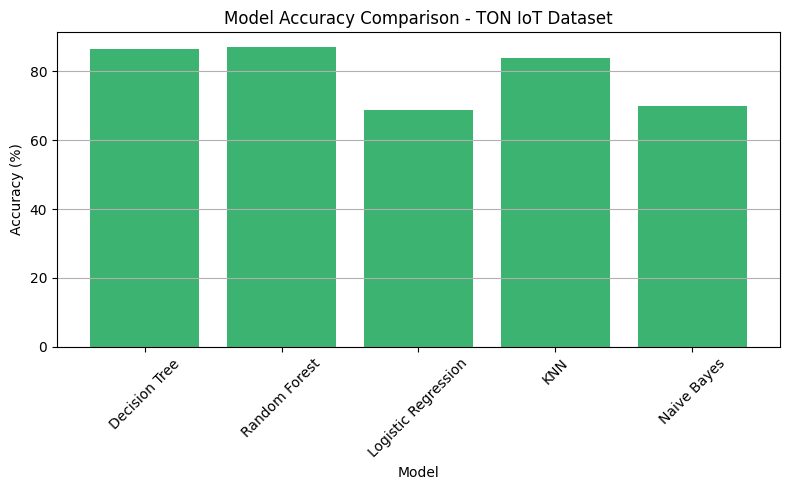

In [22]:
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), [results[m]['accuracy'] * 100 for m in results], color='mediumseagreen')
plt.title("Model Accuracy Comparison - TON IoT Dataset")
plt.ylabel("Accuracy (%)")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


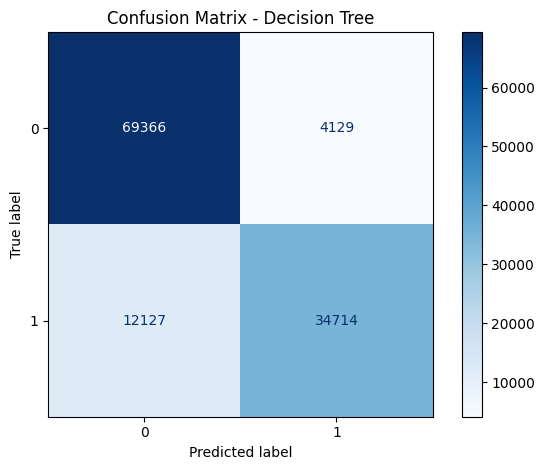

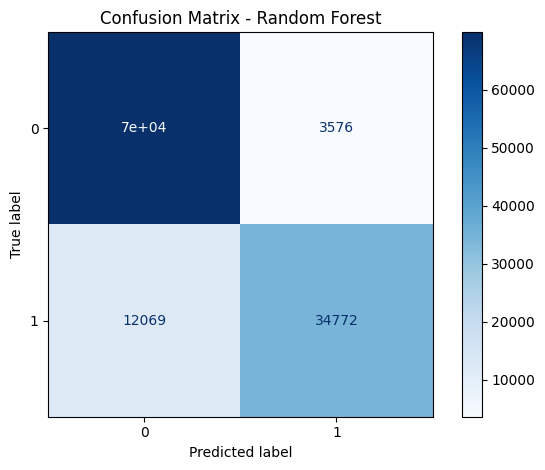

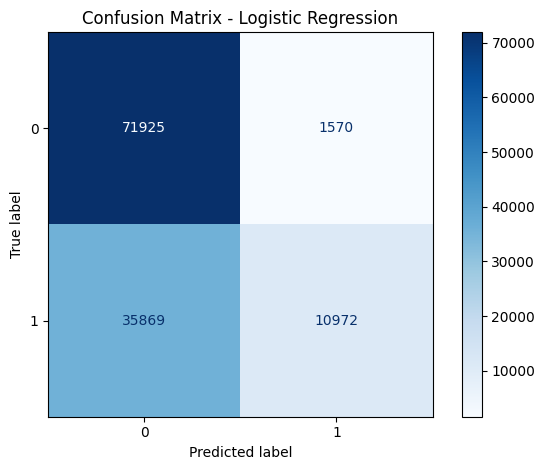

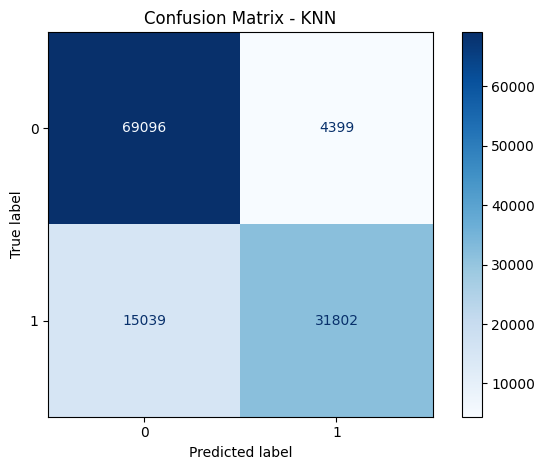

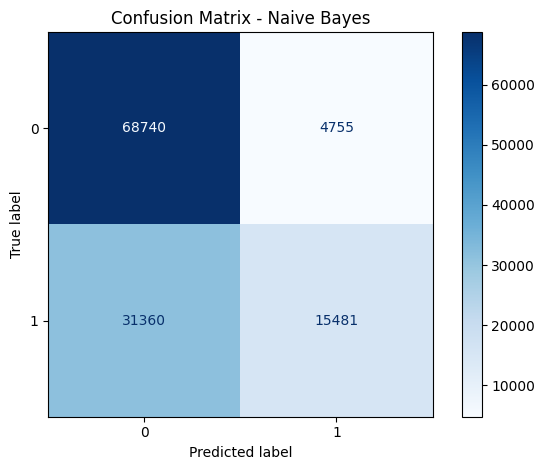

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

for name, model_data in results.items():
    cm = model_data["confusion_matrix"]
    labels = [0, 1]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()